In [57]:
#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
from imblearn.over_sampling import SMOTE

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
filepath = 'digital_marketing_campaign_dataset.csv'
marketing_data = pd.read_csv(filepath, sep=',')

marketing_data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [5]:
target = marketing_data[['Conversion']]

type(target)

pandas.core.frame.DataFrame

In [6]:
target.head()

,Conversion
0,1
1,1
2,1
3,1
4,1


In [7]:
#features = marketing_data.drop(['Conversion'], axis = 1)

In [8]:
#features.head()

In [9]:
features = marketing_data.drop(columns=['CustomerID', 'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'])

Drop unnecessary columns for prediction that provide no additional information (CustomerID is completely unique, while platform and tool are confidental - they contain 1 value only).

In [10]:
feature_cols = features.columns
feature_cols

Index(['Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend',
       'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit',
       'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks',
       'PreviousPurchases', 'LoyaltyPoints'],
      dtype='object')

In [11]:
features = pd.get_dummies(features, drop_first=False)

In [12]:
features

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,...,Gender_Male,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
0,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,...,False,False,False,False,False,True,True,False,False,False
1,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,...,True,True,False,False,False,False,False,False,False,True
2,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,...,False,False,True,False,False,False,True,False,False,False
3,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,...,False,False,True,False,False,False,False,False,True,False
4,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,21,24849,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,...,True,True,False,False,False,False,True,False,False,False
7996,43,44718,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,...,False,False,False,False,True,False,False,False,False,True
7997,28,125471,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,...,False,False,False,True,False,False,False,True,False,False
7998,19,107862,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,...,False,False,True,False,False,False,False,True,False,False


In [13]:
#features.columns

In [14]:
feature_cols = features.columns
feature_cols

Index(['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'Gender_Female', 'Gender_Male', 'CampaignChannel_Email',
       'CampaignChannel_PPC', 'CampaignChannel_Referral',
       'CampaignChannel_SEO', 'CampaignChannel_Social Media',
       'CampaignType_Awareness', 'CampaignType_Consideration',
       'CampaignType_Conversion', 'CampaignType_Retention'],
      dtype='object')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)

In [16]:
X_train.head()

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,...,Gender_Male,CampaignChannel_Email,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention
3141,36,97233,9652.953673,0.206275,0.078099,17,3.641113,3.348996,77,12,...,True,False,False,True,False,False,True,False,False,False
7099,60,79261,8606.305759,0.229620,0.131101,24,7.868377,1.234353,84,12,...,False,False,False,False,False,True,False,False,True,False
2939,65,97614,4208.041944,0.258820,0.187441,22,5.801655,3.355644,73,19,...,True,False,True,False,False,False,False,False,False,True
6884,24,68533,2931.437787,0.213318,0.146084,33,6.198697,12.038587,74,4,...,False,False,False,False,False,True,False,True,False,False
7583,60,101331,8651.058531,0.293985,0.052343,8,9.054078,2.462050,41,5,...,True,False,False,True,False,False,False,False,False,True


In [17]:
len(X_train)

5600

In [18]:
len(X_test)

2400

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train

array([[-0.51502072,  0.33645438,  1.64562587, ..., -0.56937695,
        -0.59274898, -0.57102672],
       [ 1.10595218, -0.14287092,  1.27618155, ..., -0.56937695,
         1.68705478, -0.57102672],
       [ 1.44365487,  0.34661591, -0.27631145, ..., -0.56937695,
        -0.59274898,  1.75123154],
       ...,
       [-0.98780448, -1.63914889,  1.2394056 , ..., -0.56937695,
        -0.59274898,  1.75123154],
       [ 1.17349272,  0.43956319,  0.44232635, ..., -0.56937695,
         1.68705478, -0.57102672],
       [ 1.17349272,  1.39303968,  0.00690877, ..., -0.56937695,
        -0.59274898,  1.75123154]])

In [21]:
y_train.value_counts(normalize=True)

Conversion
1             0.876429
0             0.123571
Name: proportion, dtype: float64

In [22]:
y_test.value_counts(normalize=True)

Conversion
1             0.876667
0             0.123333
Name: proportion, dtype: float64

The distribution is imbalanced, which is why oversampling is needed. When not using oversampling, logistic regression predictions had bad recall or predicted 0 of the less present category (meaning precision and recall for the "not converted" category defaulted to zero).

In [23]:
y_train = y_train.values.ravel()

## Balanced train-test split for target

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
columns = X_train.columns

In [25]:
smote = SMOTE(random_state=0)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [26]:
y_train_res

,Conversion
0,1
1,1
2,0
3,1
4,1
...,...
9801,0
9802,0
9803,0
9804,0


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled  = scaler.transform(X_test)

The above is crucial for the model to converge! Otherwise 62.8% was reached with a warning.

In [28]:
#Checking the numbers of our oversampled data
print("length of oversampled data is ",len(X_train_res))
print("Number of no conversion in oversampled data",len(y_train_res[y_train_res['Conversion']==0]))
print("Number of conversion",len(y_train_res[y_train_res['Conversion']==1]))
print("Proportion of no conversion data in oversampled data is ",len(y_train_res[y_train_res['Conversion']==0])/len(X_train_res))
print("Proportion of conversion data in oversampled data is ",len(y_train_res[y_train_res['Conversion']==1])/len(X_train_res))

length of oversampled data is  9806
Number of no conversion in oversampled data 4903
Number of conversion 4903
Proportion of no conversion data in oversampled data is  0.5
Proportion of conversion data in oversampled data is  0.5


## Imbalanced Base Logistic Regression results (for documentation)

In [77]:
# Initialize and train the logistic regression model
model_lr_base = LogisticRegression() # C=1.0, max_iter=100
model_lr_base.fit(X_train, y_train)

LogisticRegression()

In [78]:
# Make predictions on the test set
y_pred = model_lr_base.predict(X_test)

In [79]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[  55  241]
 [  18 2086]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.19      0.30       296
           1       0.90      0.99      0.94      2104

    accuracy                           0.89      2400
   macro avg       0.82      0.59      0.62      2400
weighted avg       0.88      0.89      0.86      2400


Accuracy Score:
0.8920833333333333


In [21]:
y_train_res = y_train_res.values.ravel()

## Base Logistic Regression with balanced data

In [32]:
feature_cols

Index(['Age', 'Income', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'Gender_Female', 'Gender_Male', 'CampaignChannel_Email',
       'CampaignChannel_PPC', 'CampaignChannel_Referral',
       'CampaignChannel_SEO', 'CampaignChannel_Social Media',
       'CampaignType_Awareness', 'CampaignType_Consideration',
       'CampaignType_Conversion', 'CampaignType_Retention'],
      dtype='object')

In [22]:
# Initialize and train the logistic regression model
lr_base = LogisticRegression()  # C=1.0, max_iter=100
lr_base.fit(X_train_scaled, y_train_res)

LogisticRegression()

In [23]:
# Make predictions on the test set
y_pred = lr_base.predict(X_test_scaled)

In [24]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[  75  216]
 [  42 2067]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.26      0.37       291
           1       0.91      0.98      0.94      2109

    accuracy                           0.89      2400
   macro avg       0.77      0.62      0.65      2400
weighted avg       0.87      0.89      0.87      2400


Accuracy Score:
0.8925


Accuracy reached 89.25% with the utilaziton of SMOTE and Standard Scaler after the train-test split. Note the y_test did not undergo SMOTE oversampling. This is a massive increase compared to training the model with the imbalanced set or not using standard scaler. The critical value, the Recall for category 0 (no conversion) reached 26%. It is still the weakest value.

In [114]:
# Evaluate the model WRONG
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[1329  174]
 [  21 1418]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1503
           1       0.89      0.99      0.94      1439

    accuracy                           0.93      2942
   macro avg       0.94      0.93      0.93      2942
weighted avg       0.94      0.93      0.93      2942


Accuracy Score:
0.933718558803535


Accuracy reached 93.37% with the utilaziton of SMOTE and Standard Scaler after the train-test split. This is a massive increase compared to training the model with the imbalanced set or not using standard scaler. The critical value, the Recall for category 0 (no conversion) reached 88%. It is still the weakest value butby a small margin.  

Increasing iterations next.

## Parameterized logistic regression with balanced data

In [25]:
# Initialize and train the logistic regression model
lr = LogisticRegression(C=.001, max_iter=295).fit(X_train_scaled, y_train_res)

In [26]:
y_pred = lr.predict(X_test_scaled)

In [27]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 130  161]
 [ 139 1970]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.45      0.46       291
           1       0.92      0.93      0.93      2109

    accuracy                           0.88      2400
   macro avg       0.70      0.69      0.70      2400
weighted avg       0.87      0.88      0.87      2400


Accuracy Score:
0.875


Recall for class 0 increased significantly with a slight decrease in accuracy.

In [28]:
# Initialize and train the logistic regression model
lr_high_iter = LogisticRegression(C=.001, max_iter=500).fit(X_train_scaled, y_train_res)

In [29]:
y_pred = lr_high_iter.predict(X_test_scaled)

In [30]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 130  161]
 [ 139 1970]]

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.45      0.46       291
           1       0.92      0.93      0.93      2109

    accuracy                           0.88      2400
   macro avg       0.70      0.69      0.70      2400
weighted avg       0.87      0.88      0.87      2400


Accuracy Score:
0.875


No further increase in accuracy is achieved by increasingthe number of iterations, the model already converged with 100 iterations.

## Lasso regression

In [31]:
# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train_scaled, y_train_res)

In [32]:
y_pred = lr_l1.predict(X_test_scaled)

In [33]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[  76  215]
 [  42 2067]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.26      0.37       291
           1       0.91      0.98      0.94      2109

    accuracy                           0.89      2400
   macro avg       0.77      0.62      0.66      2400
weighted avg       0.87      0.89      0.87      2400


Accuracy Score:
0.8929166666666667


The lasso (L1) regularization that provides automatic feature selection by shrinking coefficients towards zero, reached 89.29% accuracy. This is very slightly higher compared to the first logistic regression model (89.25%), but its very close. The recall for not converting (0) is 0.26, the same as the base logistic regression (0.88).

## Ridge regression

In [34]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=1, cv=4, penalty='l2').fit(X_train_scaled, y_train_res)

In [35]:
y_pred = lr_l2.predict(X_test_scaled)

In [36]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 162  129]
 [ 260 1849]]

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.56      0.45       291
           1       0.93      0.88      0.90      2109

    accuracy                           0.84      2400
   macro avg       0.66      0.72      0.68      2400
weighted avg       0.87      0.84      0.85      2400


Accuracy Score:
0.8379166666666666


The ridge (L2) regularization achieved 83.79% accuracy. The recall reachred the highes value of 0.56 but precsion values are also lower. Ridge regression is another form of regularization, which accounts for multicollienarity but it did not improve the results.

## Parameterized logistic regression with imbalanced data (for documentation)

In [80]:
lr = LogisticRegression(C=.001, max_iter=295).fit(X_train, y_train)

In [81]:
y_pred = lr.predict(X_test)

In [82]:
# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[   0  296]
 [   0 2104]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       296
           1       0.88      1.00      0.93      2104

    accuracy                           0.88      2400
   macro avg       0.44      0.50      0.47      2400
weighted avg       0.77      0.88      0.82      2400


Accuracy Score:
0.8766666666666667


C:\Users\User\anaconda3\envs\DS_Digital_Marketing\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\envs\DS_Digital_Marketing\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\envs\DS_Digital_Marketing\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

## Other

In [26]:
# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
                                          test_size=0.2,
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(marketing_data[feature_cols], marketing_data.Conversion))

# Create the dataframes
X_train = marketing_data.loc[train_idx, feature_cols]
y_train = marketing_data.loc[train_idx, 'Conversion']

X_test  = marketing_data.loc[test_idx, feature_cols]
y_test  = marketing_data.loc[test_idx, 'Conversion']

In [27]:
X_train.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool
2787,10787,26,Female,131794,Social Media,Retention,7562.712158,0.287815,0.127689,35,4.265172,12.332071,42,17,0,5,1261,IsConfid,ToolConfid
7093,15093,53,Male,64280,Social Media,Retention,5623.440404,0.023705,0.074578,40,8.998052,12.793125,69,6,0,4,3655,IsConfid,ToolConfid
6379,14379,56,Female,119826,Email,Retention,313.985706,0.021176,0.156016,45,7.061957,5.519560,20,16,4,6,4932,IsConfid,ToolConfid
3865,11865,54,Female,91019,Social Media,Retention,6876.065933,0.219177,0.064783,29,7.690586,14.105224,91,6,8,8,1960,IsConfid,ToolConfid
1167,9167,25,Female,63167,Email,Consideration,2069.226733,0.048545,0.177755,8,8.353003,1.628300,73,8,9,6,2189,IsConfid,ToolConfid


In [28]:
len(X_train)

6400

In [29]:
len(y_train)

6400

In [30]:
len(X_test)

1600

In [31]:
len(y_test)

1600

In [22]:
print(features.columns.tolist())

['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'AdvertisingPlatform', 'AdvertisingTool']


In [23]:
print(feature_cols)

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool'],
      dtype='object')


In [24]:
marketing_data.Conversion

0       1
1       1
2       1
3       1
4       1
       ..
7995    0
7996    0
7997    1
7998    1
7999    0
Name: Conversion, Length: 8000, dtype: int64

## Neural Networks

In [53]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.utils import class_weight

In [30]:
X_train_scaled.shape

(9806, 24)

In [32]:
y_train_res.shape

(9806, 1)

In [41]:
tf.random.set_seed(0)  # reprodukálható súlyok
model = Sequential([
    InputLayer(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [43]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.Recall(name='recall'),
             tf.keras.metrics.Precision(name='precision'),
             tf.keras.metrics.F1Score(name='F1'),
             tf.keras.metrics.AUC(name='AUC'),
             'accuracy']
)

In [48]:
#es = EarlyStopping(
#   monitor='val_recall',
#    mode='max',
#    patience=5,
#    restore_best_weights=True
#)

In [46]:
history = model.fit(
    X_train_scaled, y_train_res,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    callbacks=[es],
    verbose=2
)

Epoch 1/20
246/246 - 3s - 10ms/step - AUC: 0.8243 - F1: 0.7693 - accuracy: 0.7627 - loss: 0.4909 - precision: 0.7877 - recall: 0.8493 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accuracy: 0.9047 - val_loss: 0.2407 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
246/246 - 1s - 2ms/step - AUC: 0.9196 - F1: 0.7693 - accuracy: 0.8775 - loss: 0.3223 - precision: 0.8746 - recall: 0.9386 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accuracy: 0.9475 - val_loss: 0.1247 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
246/246 - 1s - 2ms/step - AUC: 0.9341 - F1: 0.7693 - accuracy: 0.8994 - loss: 0.2742 - precision: 0.8887 - recall: 0.9592 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accuracy: 0.9572 - val_loss: 0.0852 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
246/246 - 1s - 2ms/step - AUC: 0.9390 - F1: 0.7696 - accuracy: 0.9057 - loss: 0.2587 - precision: 0.8919 - recall: 0.9661 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accu

In [47]:
y_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_prob >= 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step
[[ 111  180]
 [  98 2011]]
              precision    recall  f1-score   support

           0       0.53      0.38      0.44       291
           1       0.92      0.95      0.94      2109

    accuracy                           0.88      2400
   macro avg       0.72      0.67      0.69      2400
weighted avg       0.87      0.88      0.88      2400



In [50]:
history2 = model.fit(
    X_train_scaled, y_train_res,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=2
)

Epoch 1/20
246/246 - 1s - 2ms/step - AUC: 0.9325 - F1: 0.7693 - accuracy: 0.8994 - loss: 0.2751 - precision: 0.8883 - recall: 0.9598 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accuracy: 0.9618 - val_loss: 0.0768 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
246/246 - 1s - 2ms/step - AUC: 0.9393 - F1: 0.7708 - accuracy: 0.9063 - loss: 0.2569 - precision: 0.8922 - recall: 0.9670 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accuracy: 0.9679 - val_loss: 0.0610 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
246/246 - 0s - 2ms/step - AUC: 0.9405 - F1: 0.7734 - accuracy: 0.9131 - loss: 0.2475 - precision: 0.8987 - recall: 0.9702 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accuracy: 0.9760 - val_loss: 0.0495 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
246/246 - 0s - 2ms/step - AUC: 0.9470 - F1: 0.7802 - accuracy: 0.9183 - loss: 0.2330 - precision: 0.9022 - recall: 0.9749 - val_AUC: 0.0000e+00 - val_F1: 0.0000e+00 - val_accur

In [51]:
y_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_prob >= 0.5).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step
[[ 107  184]
 [  52 2057]]
              precision    recall  f1-score   support

           0       0.67      0.37      0.48       291
           1       0.92      0.98      0.95      2109

    accuracy                           0.90      2400
   macro avg       0.80      0.67      0.71      2400
weighted avg       0.89      0.90      0.89      2400



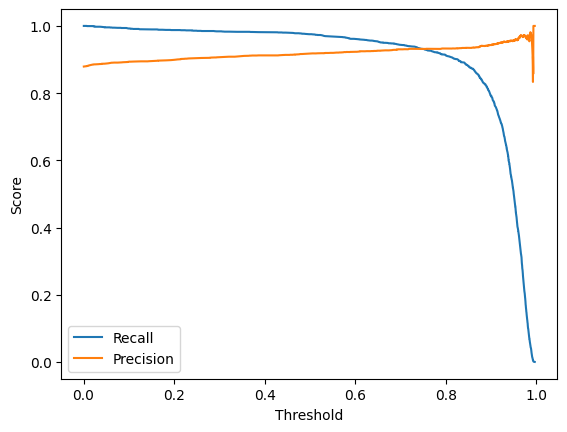

In [62]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

precision_for_plot = precision[1:]
recall_for_plot    = recall[1:]

plt.plot(thresholds, recall_for_plot,    label='Recall')
plt.plot(thresholds, precision_for_plot, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.show()

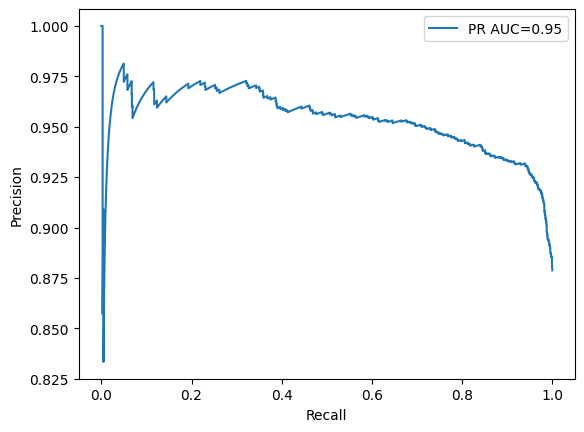

In [63]:
pr_auc = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label=f'PR AUC={pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [64]:
#y_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_prob >= 0.8).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 152  139]
 [ 185 1924]]
              precision    recall  f1-score   support

           0       0.45      0.52      0.48       291
           1       0.93      0.91      0.92      2109

    accuracy                           0.86      2400
   macro avg       0.69      0.72      0.70      2400
weighted avg       0.87      0.86      0.87      2400



In [65]:
#y_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_prob >= 0.75).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 146  145]
 [ 144 1965]]
              precision    recall  f1-score   support

           0       0.50      0.50      0.50       291
           1       0.93      0.93      0.93      2109

    accuracy                           0.88      2400
   macro avg       0.72      0.72      0.72      2400
weighted avg       0.88      0.88      0.88      2400



In [66]:
#y_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_prob >= 0.9).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 190  101]
 [ 438 1671]]
              precision    recall  f1-score   support

           0       0.30      0.65      0.41       291
           1       0.94      0.79      0.86      2109

    accuracy                           0.78      2400
   macro avg       0.62      0.72      0.64      2400
weighted avg       0.87      0.78      0.81      2400



## Increasig recall for class 0

In [ ]:
history3 = model.fit(
    X_train_scaled,
    y_train_res,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    class_weight=class_weights,
    verbose=2
)